<a href="https://colab.research.google.com/github/ankitrohilla1/Classification-techniques/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Importing Libraries

In [0]:
import numpy as np  #for numeric calculations
import pandas as pd #for data management
import matplotlib.pyplot as plt #for data visualization
from matplotlib.colors import ListedColormap #to make colorful graphs
from sklearn.preprocessing import StandardScaler #to modify data in same scale
from sklearn.linear_model import LogisticRegression #create logistic regression model
from sklearn.model_selection import train_test_split #split data into train and test data
from sklearn.metrics import confusion_matrix #to see matrix prediction
from sklearn.metrics import accuracy_score #to calculate accuracy of model

Importing Data

In [0]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [0]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

Splitting Data into Train and test data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Feature Scaling

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting Logistic Regression to data

In [7]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train) #training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Lets predict the test results now

In [0]:
y_pred = classifier.predict(X_test)

Making confusion matrix

In [0]:
cm = confusion_matrix(y_test, y_pred)

Visualizing training data results

In [0]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


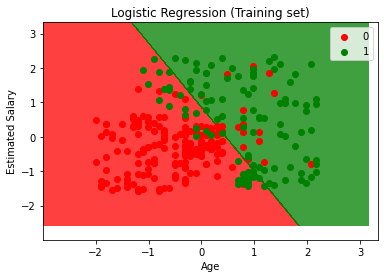

In [15]:
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X2.max())
plt.ylim(X1.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0],X_set[y_set==j,1],
              c = ListedColormap(('red','green'))(i),label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Visualising the Test set results--

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


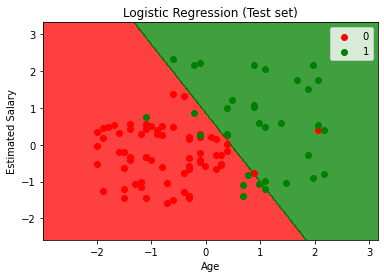

In [18]:

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Finding accuracy of the model

In [21]:
accuracy_score(y_test, y_pred)

0.89